# Pair Programming 26/05 Regresión lineal simple II - Tatiana y Guada

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable
import statsmodels.api as sm
import pylab as py
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Ejercicio 1 
Realizar de nuevo el ajuste lineal con los mismos datos y parámetros utilizados en la lección anterior.


In [4]:
df = pd.read_csv("df_elegido.csv", index_col=0)
df.head()

,capital-gain,hours-per-week
0,2174,40
1,0,13
2,0,40
3,0,40
4,0,40


In [5]:
x=df["capital-gain"].values.reshape(-1, 1) # Le hacemos el reshape ya que el modelo espera que le pasemos un array de 2 dimensiones con una única columna.Es la variable dependiente
y= df["hours-per-week"].values.reshape(-1, 1) # La variable independiente
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
LR = LinearRegression(n_jobs=-1)
LR.fit(x_train, y_train)
y_predict_train = LR.predict(x_train)
y_prediction = LR.predict(x_test)

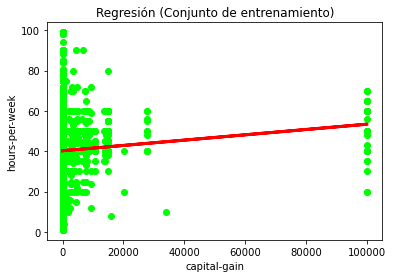

In [6]:
plt.scatter(x_test,y_test,color="lime")  # Plot a graph with X_train vs y_train
plt.plot(x_test,y_prediction,color="red", linewidth=3) 
plt.title('Regresión (Conjunto de entrenamiento)')
plt.xlabel("capital-gain")
plt.ylabel("hours-per-week")
plt.show()

# Ejercicio 2
Realizar un estudio de las asunciones de linealidad para los resultados obtenidos de nuestra regresión lineal simple.

👩🏻👩🏻‍🦰💬

En este caso resulta bastante evidente que aunque se intentase trazar una línea recta entre la nube de puntos, no podríamos decir que tuviera una tendencia lineal. Por lo tanto queda confirmado el **no cumplimiento del principio de linealidad** y no tendría sentido ninguno realizar un ajuste lineal para estas variables.

In [7]:
residuals = (y_test - y_prediction)


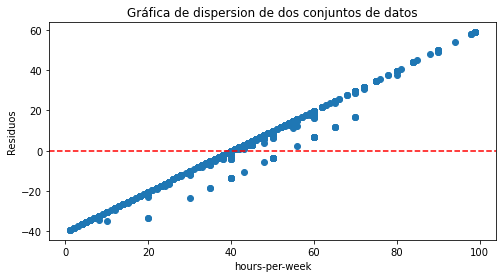

In [9]:
fig,ax = plt.subplots(figsize= (8,4))
plt.scatter(x=y_test , y=residuals)
plt.axline((float(min(y_prediction)),0),(float(max(y_prediction)),0),color="red",linestyle= '--') 
plt.title('Gráfica de dispersion de dos conjuntos de datos')
ax.set_xlabel('hours-per-week')
ax.set_ylabel('Residuos')
plt.show()


# Ejercicio 3
Interpretación de los resultados. Ahora interpreta los resultados obtenidos del estudio de las asunciones de linealidad del ajuste lineal simple y explica lo mejor posible los resultados obtenidos, así como si se cumple o se incumple algunas de las asunciones de linealidad.